Student Performance: Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
df = pd.read_csv("StudentsPerformance.csv")

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.head(50)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

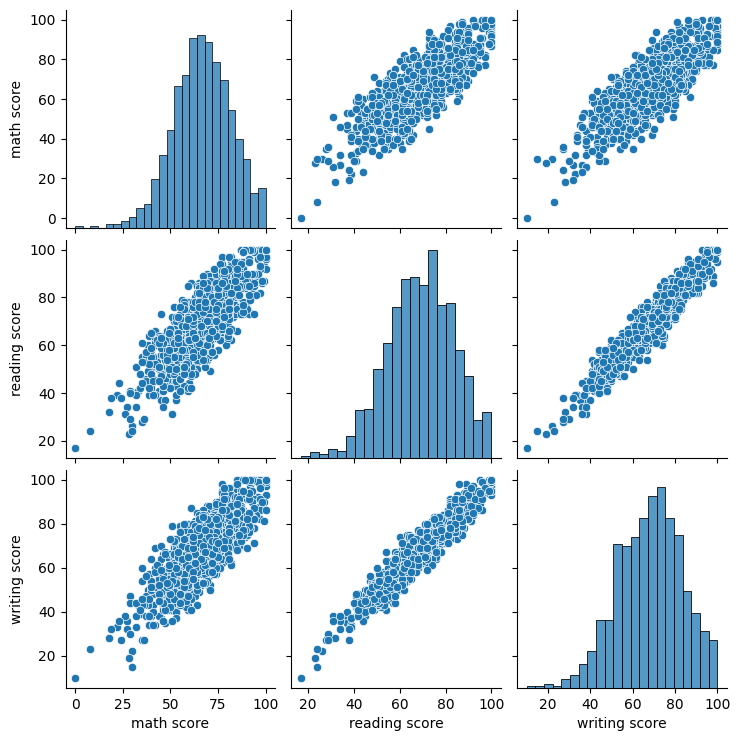

In [ ]:
sns.pairplot(df)

In [ ]:
# Check distribution of categorical features

categorical_cols = ['gender', 'race/ethnicity', 'parental level of education',
                    'lunch', 'test preparation course']

# Loop through each categorical column and show value counts
for col in categorical_cols:
    print(f"{col} distribution:")
    print(df[col].value_counts())
    print("\n")

gender distribution:
gender
female    518
male      482
Name: count, dtype: int64


race/ethnicity distribution:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


parental level of education distribution:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


lunch distribution:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64


test preparation course distribution:
test preparation course
none         642
completed    358
Name: count, dtype: int64




In [ ]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<Axes: xlabel='math score', ylabel='Count'>

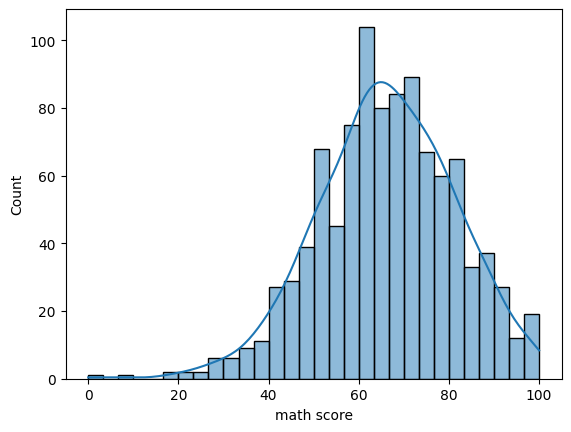

In [ ]:
sns.histplot(df['math score'],bins=30,kde=True)

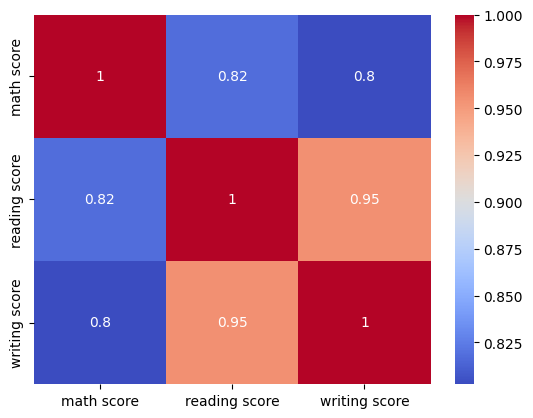

In [ ]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

# Visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# label encoding for categorical features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [ ]:
ohe = OneHotEncoder()
ohe_array = ohe.fit_transform(df[['race/ethnicity', 'parental level of education']]).toarray()

# Get proper column names
ohe_cols = ohe.get_feature_names_out(['race/ethnicity', 'parental level of education'])

# Convert to DataFrame with column names
ohe_df = pd.DataFrame(ohe_array, columns=ohe_cols)

# Concatenate and drop original columns
df = pd.concat([df, ohe_df], axis=1)
df.drop(columns=['race/ethnicity', 'parental level of education'], inplace=True)

In [ ]:
df.columns

Index(['gender', 'lunch', 'test preparation course', 'math score',
       'reading score', 'writing score', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school'],
      dtype='object')

In [ ]:
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,72,72,74,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,1,0,69,90,88,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,1,90,95,93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,1,47,57,44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,76,78,75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Define Features (X) and Targets (y)
X = df.drop(columns=['math score', 'reading score', 'writing score'])
y = df[['math score', 'reading score', 'writing score']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 10.76443456086888
Root Mean Squared Error (RMSE): 13.762006966337255


In [ ]:
coefficients = pd.DataFrame(model.coef_, columns=X.columns, index=['Math','Reading','Writing'])
print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
           gender      lunch  test preparation course  race/ethnicity_group A  \
Math     4.520714  11.523997                -5.874513               -2.695060   
Reading -7.413715   7.465526                -7.571180               -1.488150   
Writing -9.382566   8.633442               -10.187402               -2.128294   

         race/ethnicity_group B  race/ethnicity_group C  \
Math                  -2.512699               -2.092187   
Reading               -2.018486               -0.813934   
Writing               -2.199812               -0.651579   

         race/ethnicity_group D  race/ethnicity_group E  \
Math                   0.917072                6.382874   
Reading                1.323863                2.996707   
Writing                2.790135                2.189551   

         parental level of education_associate's degree  \
Math                                           0.489708   
Reading                                        0.564135   
W

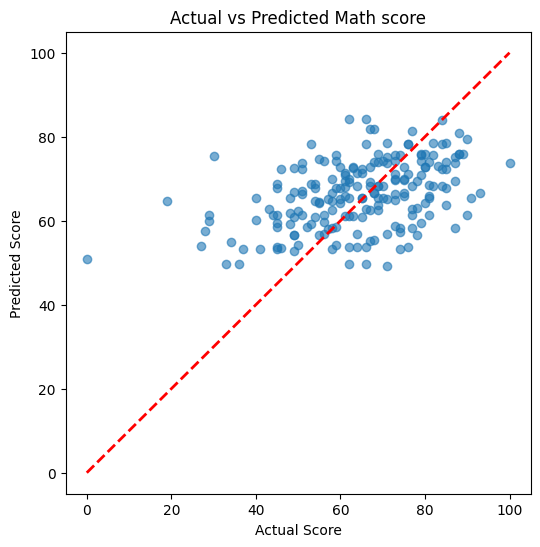

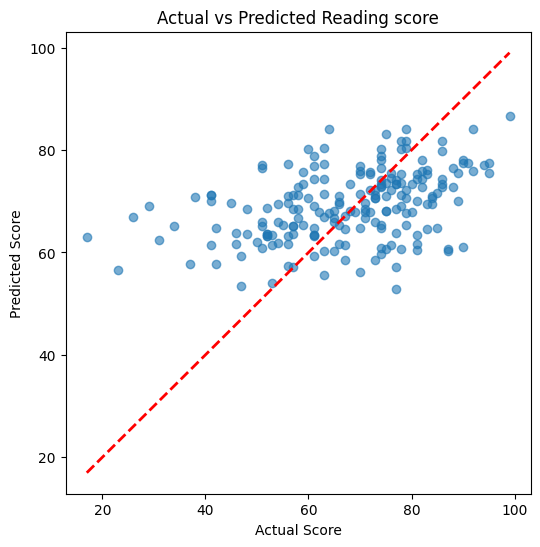

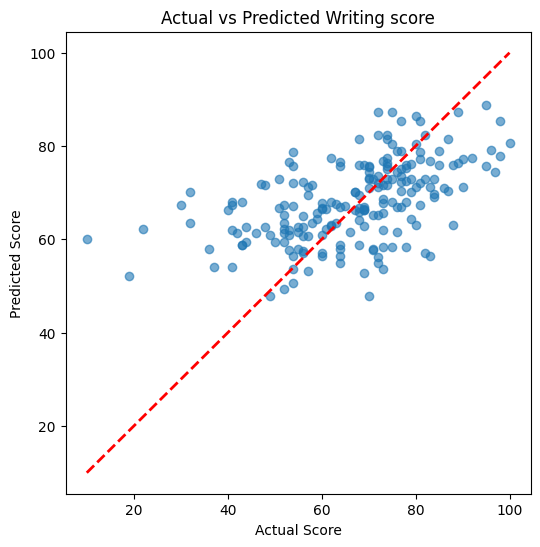

In [ ]:
# List of target subjects
subjects = ['math score', 'reading score', 'writing score']

# Loop through each subject
for i, subject in enumerate(subjects):
    plt.figure(figsize=(6, 6))

    # Actual vs Predicted values
    plt.scatter(y_test[subject], y_pred[:, i], alpha=0.6)

    # Diagonal line (perfect prediction reference)
    plt.plot([y_test[subject].min(), y_test[subject].max()],
             [y_test[subject].min(), y_test[subject].max()],
             'r--', lw=2)

    plt.title(f'Actual vs Predicted {subject.capitalize()}')
    plt.xlabel("Actual Score")
    plt.ylabel("Predicted Score")
    plt.show()
